# Dimensionality reduction using (PCA)

In this project we will analyze the dataset `decathlon.xlsx` that entails which athletes and sports in which they have participated as well as their ranking and overall score. We will choose only the sport variables. There are 10 of them! Our <b> goal </b> will be to see if these 10 variables which create a space of <u> 10 dimensions </u> can be summarized in a smaller dimensional space!

## Importing the appropriate packages

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading our data

In [4]:
decathlon=pd.read_excel('decathlon.xlsx')
print(decathlon.head())

  Unnamed: 0   100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  \
0     SEBRLE  11.04       7.58     14.83       2.07  49.81        14.69   
1       CLAY  10.76       7.40     14.26       1.86  49.37        14.05   
2     KARPOV  11.02       7.30     14.77       2.04  48.37        14.09   
3    BERNARD  11.02       7.23     14.25       1.92  48.93        14.99   
4     YURKOV  11.34       7.09     15.19       2.10  50.42        15.31   

   Discus  Pole.vault  Javeline  1500m  Rank  Points Competition  
0   43.75        5.02     63.19  291.7     1    8217    Decastar  
1   50.72        4.92     60.15  301.5     2    8122    Decastar  
2   48.95        4.92     50.31  300.2     3    8099    Decastar  
3   40.87        5.32     62.77  280.1     4    8067    Decastar  
4   46.26        4.72     63.44  276.4     5    8036    Decastar  


## Inspecting and choosing the right data

Here we can see that we have 14 columns. Although we won't use the first column as it is all about the surname of the athlete let's change its name!

In [15]:
#renaming the first column
decathlon.rename(columns={'Unnamed: 0':'Surname'},inplace=True)
print(decathlon.head())

   Surname   100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
0   SEBRLE  11.04       7.58     14.83       2.07  49.81        14.69   43.75   
1     CLAY  10.76       7.40     14.26       1.86  49.37        14.05   50.72   
2   KARPOV  11.02       7.30     14.77       2.04  48.37        14.09   48.95   
3  BERNARD  11.02       7.23     14.25       1.92  48.93        14.99   40.87   
4   YURKOV  11.34       7.09     15.19       2.10  50.42        15.31   46.26   

   Pole.vault  Javeline  1500m  Rank  Points Competition  
0        5.02     63.19  291.7     1    8217    Decastar  
1        4.92     60.15  301.5     2    8122    Decastar  
2        4.92     50.31  300.2     3    8099    Decastar  
3        5.32     62.77  280.1     4    8067    Decastar  
4        4.72     63.44  276.4     5    8036    Decastar  


Now we will choose <b> only </b> the 10 columns that are necessary for our PCA analysis!

In [153]:
data=decathlon.iloc[:,1:11]
print(data.head())

    100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
0  11.04       7.58     14.83       2.07  49.81        14.69   43.75   
1  10.76       7.40     14.26       1.86  49.37        14.05   50.72   
2  11.02       7.30     14.77       2.04  48.37        14.09   48.95   
3  11.02       7.23     14.25       1.92  48.93        14.99   40.87   
4  11.34       7.09     15.19       2.10  50.42        15.31   46.26   

   Pole.vault  Javeline  1500m  
0        5.02     63.19  291.7  
1        4.92     60.15  301.5  
2        4.92     50.31  300.2  
3        5.32     62.77  280.1  
4        4.72     63.44  276.4  


Let's print and plot the correlation between the 10 variables. We can seee that there some strong relationships between the variables so it would be a great idea to continue with the PCA analysis!

In [155]:
#correlation
correlation=data.corr()
print(correlation)

                 100m  Long.jump  Shot.put  High.jump      400m  110m.hurdle  \
100m         1.000000  -0.598678 -0.356482  -0.246253  0.520298     0.579889   
Long.jump   -0.598678   1.000000  0.183304   0.294644 -0.602063    -0.505410   
Shot.put    -0.356482   0.183304  1.000000   0.489212 -0.138433    -0.251616   
High.jump   -0.246253   0.294644  0.489212   1.000000 -0.187957    -0.283289   
400m         0.520298  -0.602063 -0.138433  -0.187957  1.000000     0.547988   
110m.hurdle  0.579889  -0.505410 -0.251616  -0.283289  0.547988     1.000000   
Discus      -0.221708   0.194310  0.615768   0.369218 -0.117879    -0.326201   
Pole.vault  -0.082537   0.204014  0.061182  -0.156181 -0.079292    -0.002704   
Javeline    -0.157746   0.119759  0.374956   0.171880  0.004232     0.008743   
1500m       -0.060546  -0.033686  0.115803  -0.044903  0.408106     0.037540   

               Discus  Pole.vault  Javeline     1500m  
100m        -0.221708   -0.082537 -0.157746 -0.060546  
Long.ju

<AxesSubplot:>

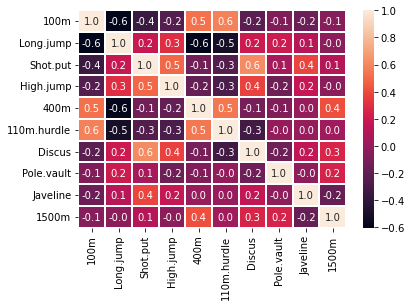

In [161]:
#heatmap
import seaborn as sns
sns.heatmap(correlation, annot=True,fmt=".1f",linewidth=.1)

## Let's begin the analysis!

Now, that we have our data let's begin with our analysis! Firstly we will standardize our data.

In [125]:
#standardizing our data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_new=scaler.fit_transform(data)


Now, we will continue with the PCA part. It is obvious that our data can be summarized in a smaller dimensional space! Taking into account the <u> <i> <b> Kaiser's </b> </i> </u>  criterion which states that the components that have an eigenvalue greater than 1 are selected, we will choose the first 4 principal components. An eigenvalue greater than 1 indicates that the corresponding component explains more variance than was explained by one variable of the separate variance of each variable in the standardized matrix represents unity. The cumulative variance explance taking only the 4 components is almost 75% (74,708%). Thus, by making PCA we achieved to explain 75% of our data's variance <u> only by looking at a four-dimensional space </u> (which is a great achievement)!

In [149]:
#making the pca
from sklearn.decomposition import PCA
pca = PCA(n_components=10,svd_solver="full")
pca.fit(data_new)
#taking the explained variance (eigenvalue) for each component
variance=pca.explained_variance_
#explained variance ratio
variance_ratio=(pca.explained_variance_ratio_)*100
#cumulative explained variance ratio
cum=np.cumsum(variance_ratio)
#bulding a dataframe
names=data.columns
table=pd.DataFrame({'Variable name':names,'Eigenvalue':variance,'% of explained variance ratio':variance_ratio,'% of cumulative explained variance ratio':cum})
print(table)

  Variable name  Eigenvalue  % of explained variance ratio  \
0          100m    3.353703                      32.719055   
1     Long.jump    1.780559                      17.371310   
2      Shot.put    1.440040                      14.049167   
3     High.jump    1.083272                      10.568504   
4          400m    0.701893                       6.847735   
5   110m.hurdle    0.614250                       5.992687   
6        Discus    0.462516                       4.512353   
7    Pole.vault    0.406799                       3.968766   
8      Javeline    0.220185                       2.148149   
9         1500m    0.186783                       1.822275   

   % of cumulative explained variance ratio  
0                                 32.719055  
1                                 50.090366  
2                                 64.139532  
3                                 74.708036  
4                                 81.555771  
5                                 87.5484

Let's make the <b> scree plot </b> that is another way of judging which components it would be good to choose! We can see that after the components 3-4 the added value of each component increases but with lower degree.

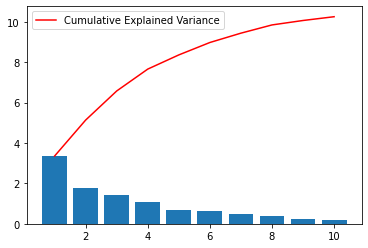

In [148]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
plt.plot(range(1,len(pca.explained_variance_)+1),np.cumsum(pca.explained_variance_),c='r',label='Cumulative Explained Variance')
plt.legend(loc="best")
plt.show()

<u> Now, let's take the loading scores for each component! </u>
- The first component consists of the variables (100m, 400m and 110m hurdle). These variables are negatively loaded with the first principal component. So we could say that the first factorial axis consists of variables related to athletics. We have 100m, 400m and 100m steeplechase.
- The second principal component consists of the variables (shot put, high jump and discus). The loadings of these variables are positive. So, this factorial axis contains variables related to the sports: high jump, shot put and discus).
- The third principal component contains the sports (pole vault and 1500m), whose loadings are positive. So, it is concluded that this factor axis refers to the sports of pole vault and 1500m endurance.
- Finally, the fourth principal component contains only the javelin variable, which loads positively on the factor axis.

In [150]:
#the loading scores
loadings=pca.components_
names=data.columns
loadings_new=loadings[0:4]
loadtable=pd.DataFrame(loadings_new,columns=names,index=['PCA 1','PCA 2','PCA 3','PCA 4'])
print(loadtable)

           100m  Long.jump  Shot.put  High.jump      400m  110m.hurdle  \
PCA 1 -0.428296   0.410152  0.344144   0.316194 -0.375716    -0.412554   
PCA 2  0.141989  -0.262079  0.453947   0.265776  0.432046     0.173591   
PCA 3 -0.155580   0.153727 -0.019724  -0.218943  0.110918    -0.078156   
PCA 4 -0.036787   0.099010  0.185395  -0.131897  0.028503     0.282901   

         Discus  Pole.vault  Javeline     1500m  
PCA 1  0.305426    0.027831  0.153198 -0.032107  
PCA 2  0.460024   -0.136841  0.240507  0.359805  
PCA 3  0.036238    0.583617 -0.328742  0.659874  
PCA 4 -0.252591    0.536495  0.692855 -0.156696  


To sum up:
- We achieved to summarize the data in a 4 - dimensional space instead of 10.
- The four components together explain almost 75% of the variance.
- The first component consists of the variables (100m, 400m and 110m hurdle).
- The second principal component consists of the variables (shot put, high jump and discus).
- The third principal component contains the sports (pole vault and 1500m).
- Finally, the fourth principal component contains only the javelin variable